[ 5.2         0.825      -3.940625   -6.89960938 -8.44868164 -9.19437866
 -9.53581314 -9.68702536 -9.75242029 -9.78020228 -9.79184261 -9.79666601
 -9.79864664 -9.79945382 -9.79978068 -9.79991232 -9.79996508 -9.79998614
 -9.79999452 -9.79999784 -9.79999915 -9.79999967 -9.79999987 -9.79999995
 -9.79999998 -9.79999999 -9.8        -9.8        -9.8        -9.8
 -9.8        -9.8        -9.8        -9.8        -9.8        -9.8
 -9.8        -9.8        -9.8        -9.8        -9.8        -9.8
 -9.8        -9.8        -9.8        -9.8        -9.8        -9.8
 -9.8        -9.8        -9.8        -9.8        -9.8        -9.8
 -9.8        -9.8        -9.8        -9.8        -9.8        -9.8
 -9.8        -9.8        -9.8        -9.8        -9.8        -9.8
 -9.8        -9.8        -9.8        -9.8        -9.8        -9.8
 -9.8        -9.8        -9.8        -9.8        -9.8        -9.8
 -9.8        -9.8        -9.8        -9.8        -9.8        -9.8
 -9.8        -9.8        -9.8        -9.8       

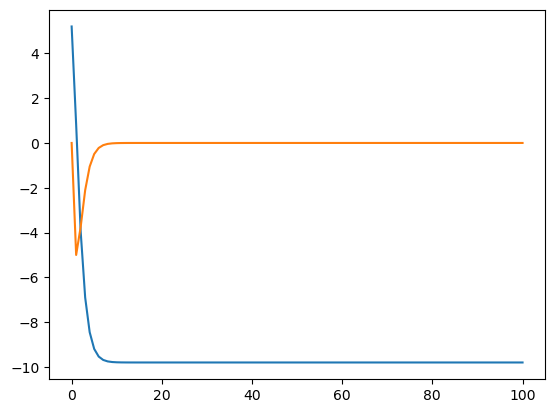

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# uはx,vはuとして置き換えている（前回の課題で作成した関数を流用したため）
n = 100
a = 0
t = 100
m = 1
k = 1
c_v = 2
g = 9.8
x_0 = 15


# dx/dt
def f_1(x, u):
    return u


# du/dt
def f_2(x, u):
    return -g - k * x / m - c_v * u / m


def solve_oed_runge_kutta(a, b, f_1, f_2, n, u_a, v_a):
    dt = (b - a) / n
    t = [a + i * dt for i in range(n + 1)]
    u = np.zeros(n + 1)
    v = np.zeros(n + 1)

    u[0] = u_a
    v[0] = v_a

    for i in range(n):
        k_1 = f_1(u[i], v[i])
        l_1 = f_2(u[i], v[i])

        k_2 = f_1(u[i] + (1 / 2) * dt * k_1, v[i] + (1 / 2) * dt * l_1)
        l_2 = f_2(u[i] + (1 / 2) * dt * k_1, v[i] + (1 / 2) * dt * l_1)

        k_3 = f_1(u[i] + (1 / 2) * dt * k_2, v[i] + (1 / 2) * dt * l_2)
        l_3 = f_2(u[i] + (1 / 2) * dt * k_2, v[i] + (1 / 2) * dt * l_2)

        k_4 = f_1(u[i] + dt * k_3, v[i] + dt * l_3)
        l_4 = f_2(u[i] + dt * k_3, v[i] + dt * l_3)
        u[i + 1] = u[i] + (1 / 6) * dt * (k_1 + 2 * (k_2 + k_3) + k_4)
        v[i + 1] = v[i] + (1 / 6) * dt * (l_1 + 2 * (l_2 + l_3) + l_4)

    return (u, v)


x, u = solve_oed_runge_kutta(a, t, f_1, f_2, n, x_0 - m * g / k, 0)

print(x)
print(u)

t = [i for i in range(n + 1)]
x_kansu = [x[i] for i in t]
u_kansu = [u[i] for i in t]

plt.plot(t, x_kansu)
plt.plot(t, u_kansu)
plt.show()

5.199999999999999